In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3552, 18)

In [5]:
df.head()

,property_type,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dwarka expressway,Ansals Highland Park,1.20,6186.0,3,3,3+,4.0,Under Construction,1940.0,0,1,0,0,0,0,0
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,4,6,2,11.0,New Property,2521.0,0,1,0,0,1,0,86
2,flat,sohna road,Signature Global Park4.0 ★,0.72,5990.0,2,2,3,3.0,Relatively New,1095.0,0,0,0,1,0,0,158
3,house,sector 112,experion windchants,9.50,23457.0,5,5,3,2.0,Relatively New,7450.0,0,1,0,0,0,0,45
4,flat,sector 70a,BPTP Astaire Gardens3.7 ★,1.60,8658.0,4,4,3,1.0,Relatively New,1600.0,1,0,0,0,1,0,42


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dwarka expressway,1.20,3,3,3+,4.0,Under Construction,1940.0,0,1,0,0,0,0,0
1,flat,sector 86,1.30,4,6,2,11.0,New Property,2521.0,0,1,0,0,1,0,86
2,flat,sohna road,0.72,2,2,3,3.0,Relatively New,1095.0,0,0,0,1,0,0,158
3,house,sector 112,9.50,5,5,3,2.0,Relatively New,7450.0,0,1,0,0,0,0,45
4,flat,sector 70a,1.60,4,4,3,1.0,Relatively New,1600.0,1,0,0,0,1,0,42


### luxury score

<Axes: >

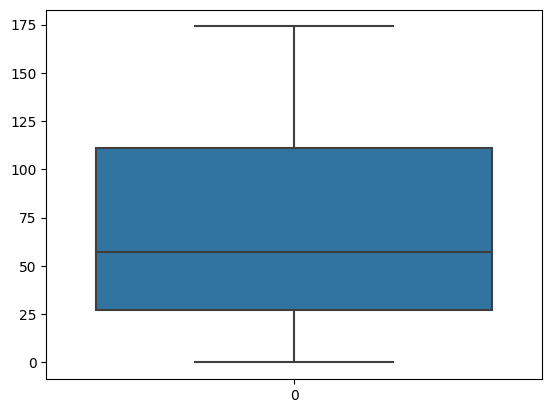

In [ ]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,dwarka expressway,1.20,3,3,3+,4.0,Under Construction,1940.0,0,1,0,0,0,0,0,Low
1,flat,sector 86,1.30,4,6,2,11.0,New Property,2521.0,0,1,0,0,1,0,86,Medium
2,flat,sohna road,0.72,2,2,3,3.0,Relatively New,1095.0,0,0,0,1,0,0,158,High
3,house,sector 112,9.50,5,5,3,2.0,Relatively New,7450.0,0,1,0,0,0,0,45,Low
4,flat,sector 70a,1.60,4,4,3,1.0,Relatively New,1600.0,1,0,0,0,1,0,42,Low


### floorNum

<Axes: >

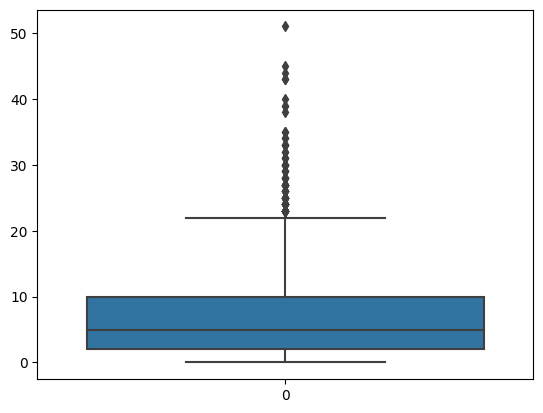

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,dwarka expressway,1.20,3,3,3+,4.0,Under Construction,1940.0,0,1,0,0,0,0,0,Low,Mid Floor
1,flat,sector 86,1.30,4,6,2,11.0,New Property,2521.0,0,1,0,0,1,0,86,Medium,High Floor
2,flat,sohna road,0.72,2,2,3,3.0,Relatively New,1095.0,0,0,0,1,0,0,158,High,Mid Floor
3,house,sector 112,9.50,5,5,3,2.0,Relatively New,7450.0,0,1,0,0,0,0,45,Low,Low Floor
4,flat,sector 70a,1.60,4,4,3,1.0,Relatively New,1600.0,1,0,0,0,1,0,42,Low,Low Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,dwarka expressway,1.20,3,3,3+,Under Construction,1940.0,0,1,0,0,0,0,Low,Mid Floor
1,flat,sector 86,1.30,4,6,2,New Property,2521.0,0,1,0,0,1,0,Medium,High Floor
2,flat,sohna road,0.72,2,2,3,Relatively New,1095.0,0,0,0,1,0,0,High,Mid Floor
3,house,sector 112,9.50,5,5,3,Relatively New,7450.0,0,1,0,0,0,0,Low,Low Floor
4,flat,sector 70a,1.60,4,4,3,Relatively New,1600.0,1,0,0,0,1,0,Low,Low Floor


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['arjun nagar', 'bhondsi', 'devilal colony', 'dwarka expressway',
       'gwal pahari', 'manesar', 'ravi nagar', 'saraswati vihar',
       'sector 1', 'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 22', 'sector 23', 'sector 24', 'sector 25', 'sector 26',
       'sector 27', 'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,3.0,3,3,4.0,4.0,1940.0,0,1,0,0,0,0,1.0,2.0
1,0.0,102.0,4,6,2.0,1.0,2521.0,0,1,0,0,1,0,2.0,0.0
2,0.0,115.0,2,2,3.0,3.0,1095.0,0,0,0,1,0,0,0.0,2.0
3,1.0,21.0,5,5,3.0,3.0,7450.0,0,1,0,0,0,0,1.0,1.0
4,0.0,85.0,4,4,3.0,3.0,1600.0,1,0,0,0,1,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,0.0,14.0,2,2,3.0,3.0,1281.0,1,0,0,0,0,1,0.0,2.0
3548,0.0,107.0,4,4,4.0,0.0,2468.0,0,1,0,0,1,0,1.0,0.0
3549,0.0,55.0,4,4,2.0,2.0,3194.0,0,1,0,0,0,2,1.0,2.0
3550,0.0,115.0,2,2,2.0,3.0,762.0,0,0,0,0,0,0,2.0,2.0


In [20]:
y_label

0       1.20
1       1.30
2       0.72
3       9.50
4       1.60
        ... 
3547    0.98
3548    2.00
3549    2.25
3550    0.40
3551    2.40
Name: price, Length: 3552, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

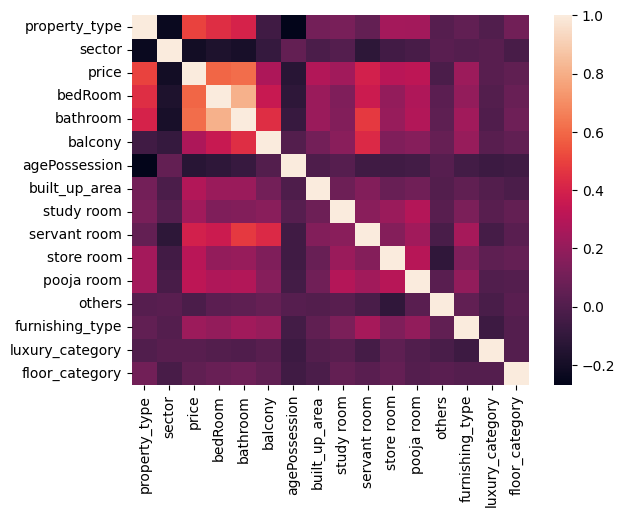

In [21]:
sns.heatmap(data_label_encoded.select_dtypes(include=["int64","float64"]).corr())

In [22]:
fi_df1 = data_label_encoded.select_dtypes(include=["int64","float64"]).corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.205023
1,price,1.000000
2,bedRoom,0.588864
3,bathroom,0.612073
4,balcony,0.272871
5,agePossession,-0.134929
6,built_up_area,0.289955
7,study room,0.239002
8,servant room,0.391629
9,store room,0.310970


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.625368
0,property_type,0.115504
1,sector,0.109595
3,bathroom,0.028076
2,bedRoom,0.026434
8,servant room,0.020215
5,agePossession,0.014573
4,balcony,0.012215
12,furnishing_type,0.010501
7,study room,0.008093


### Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.655310
1,sector,0.111999
0,property_type,0.101294
3,bathroom,0.042691
2,bedRoom,0.041524
8,servant room,0.027096
9,store room,0.008114
5,agePossession,0.004417
7,study room,0.002301
12,furnishing_type,0.002239


### Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.677869
0,property_type,0.196360
1,sector,0.147657
8,servant room,0.039214
3,bathroom,0.004447
9,store room,0.002790
5,agePossession,0.001866
14,floor_category,0.001547
2,bedRoom,0.001090
7,study room,0.001050


### Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
0,property_type,0.762000
3,bathroom,0.611397
2,bedRoom,0.402647
6,built_up_area,0.376456
8,servant room,0.364400
9,store room,0.249106
7,study room,0.210451
12,furnishing_type,0.150375
10,pooja room,0.120214
4,balcony,0.060059


### Technique 6 - RFE

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.628629
0,property_type,0.113944
1,sector,0.106241
2,bedRoom,0.028065
3,bathroom,0.025605
8,servant room,0.023931
5,agePossession,0.013303
4,balcony,0.012089
12,furnishing_type,0.010969
7,study room,0.008450


### Technique 7 - Linear Regression Weights

In [28]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
0,property_type,0.767452
3,bathroom,0.608921
2,bedRoom,0.402747
6,built_up_area,0.383608
8,servant room,0.366422
9,store room,0.251730
7,study room,0.216477
12,furnishing_type,0.157665
10,pooja room,0.123108
4,balcony,0.066884


### Technique 8 - SHAP

In [31]:
# !pip install shap

In [33]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


d:\Real Estate\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[-0.50609576, -0.60501148, -0.05030107, ..., -0.02350495,
        -0.00339369, -0.01821011],
       [-0.34630624, -1.30764756,  0.02293995, ..., -0.02678225,
        -0.01187634,  0.01586945],
       [-0.20982892, -0.52499059, -0.04240005, ..., -0.01531527,
         0.01995765, -0.00864204],
       ...,
       [-1.61783917,  0.28562432, -0.0308624 , ...,  0.01309675,
        -0.0189407 , -0.05474684],
       [-0.20944778, -0.45871394, -0.04843015, ..., -0.01432723,
         0.00278024, -0.00331113],
       [-0.41793107,  0.02569738,  0.02612733, ..., -0.0133546 ,
         0.00397368,  0.06021627]])

In [34]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.230808
0,property_type,0.492509
1,sector,0.403919
3,bathroom,0.122619
8,servant room,0.099341
2,bedRoom,0.056591
4,balcony,0.038910
12,furnishing_type,0.029771
5,agePossession,0.026917
14,floor_category,0.023727


In [35]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [36]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.205023,0.109595,0.111999,0.147657,-0.132650,0.106241,-0.140623,0.403919
bedRoom,0.588864,0.026434,0.041524,0.001090,0.402647,0.028065,0.402747,0.056591
bathroom,0.612073,0.028076,0.042691,0.004447,0.611397,0.025605,0.608921,0.122619
balcony,0.272871,0.012215,0.001272,0.000797,0.060059,0.012089,0.066884,0.038910
agePossession,-0.134929,0.014573,0.004417,0.001866,-0.010685,0.013303,-0.018170,0.026917
built_up_area,0.289955,0.625368,0.655310,0.677869,0.376456,0.628629,0.383608,1.230808
study room,0.239002,0.008093,0.002301,0.001050,0.210451,0.008450,0.216477,0.020326
servant room,0.391629,0.020215,0.027096,0.039214,0.364400,0.023931,0.366422,0.099341
store room,0.310970,0.007658,0.008114,0.002790,0.249106,0.005947,0.251730,0.016677


In [37]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [38]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.701507
sector             0.145927
servant room       0.034434
bathroom           0.034303
bedRoom            0.027182
agePossession      0.010267
balcony            0.009655
furnishing_type    0.007204
store room         0.007104
study room         0.006422
floor_category     0.005316
luxury_category    0.004971
pooja room         0.003773
others             0.001934
dtype: float64

In [39]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,3.0,3,3,4.0,4.0,1940.0,0,1,0,0,0,0,1.0,2.0
1,0.0,102.0,4,6,2.0,1.0,2521.0,0,1,0,0,1,0,2.0,0.0
2,0.0,115.0,2,2,3.0,3.0,1095.0,0,0,0,1,0,0,0.0,2.0
3,1.0,21.0,5,5,3.0,3.0,7450.0,0,1,0,0,0,0,1.0,1.0
4,0.0,85.0,4,4,3.0,3.0,1600.0,1,0,0,0,1,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,0.0,14.0,2,2,3.0,3.0,1281.0,1,0,0,0,0,1,0.0,2.0
3548,0.0,107.0,4,4,4.0,0.0,2468.0,0,1,0,0,1,0,1.0,0.0
3549,0.0,55.0,4,4,2.0,2.0,3194.0,0,1,0,0,0,2,1.0,2.0
3550,0.0,115.0,2,2,2.0,3.0,762.0,0,0,0,0,0,0,2.0,2.0


In [40]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [41]:
scores.mean()

0.7998287096462697

In [42]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [43]:
scores.mean()

0.7996451370801732

In [44]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [45]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [46]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,3.0,3,3,4.0,4.0,1940.0,1,0,0,1.0,2.0,1.20
1,0.0,102.0,4,6,2.0,1.0,2521.0,1,0,0,2.0,0.0,1.30
2,0.0,115.0,2,2,3.0,3.0,1095.0,0,0,0,0.0,2.0,0.72
3,1.0,21.0,5,5,3.0,3.0,7450.0,1,0,0,1.0,1.0,9.50
4,0.0,85.0,4,4,3.0,3.0,1600.0,0,0,0,1.0,1.0,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,0.0,14.0,2,2,3.0,3.0,1281.0,0,0,1,0.0,2.0,0.98
3548,0.0,107.0,4,4,4.0,0.0,2468.0,1,0,0,1.0,0.0,2.00
3549,0.0,55.0,4,4,2.0,2.0,3194.0,1,0,2,1.0,2.0,2.25
3550,0.0,115.0,2,2,2.0,3.0,762.0,0,0,0,2.0,2.0,0.40
